El dataset que escogi fue el siguiente: https://www.kaggle.com/datasets/vikasukani/diabetes-data-set

Es un data set con distintos datos medicos para predecir si alguien tiene diabetes o no.

In [78]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [79]:
#Importando dataset y convirtiendolo en DF
df = pd.read_csv(r'Datasets\diabetes-dataset.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [80]:
#Verificando que no haya valores nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    1316
1     684
Name: count, dtype: int64

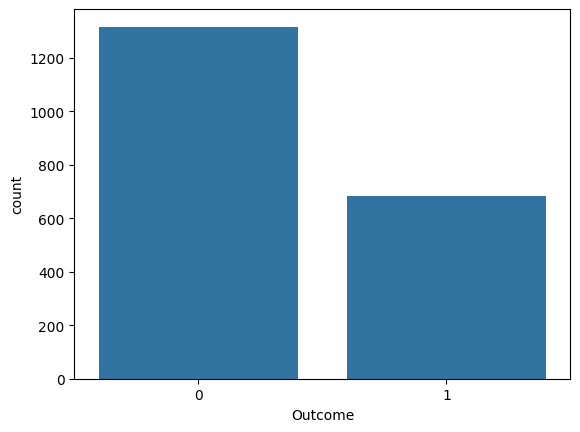

In [81]:
#Mirando como está destribuida la variable target
sns.countplot(x='Outcome', data=df)
df['Outcome'].value_counts()

In [82]:
#Quitando 730 registros al azar con Outcome 0, para trabajar con un dataset balanceado
para_borrar = df[df['Outcome'] == 0].sample(713, random_state=42)
df = df.drop(para_borrar.index)

In [83]:
#Eliminando outliers usando el metodo IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

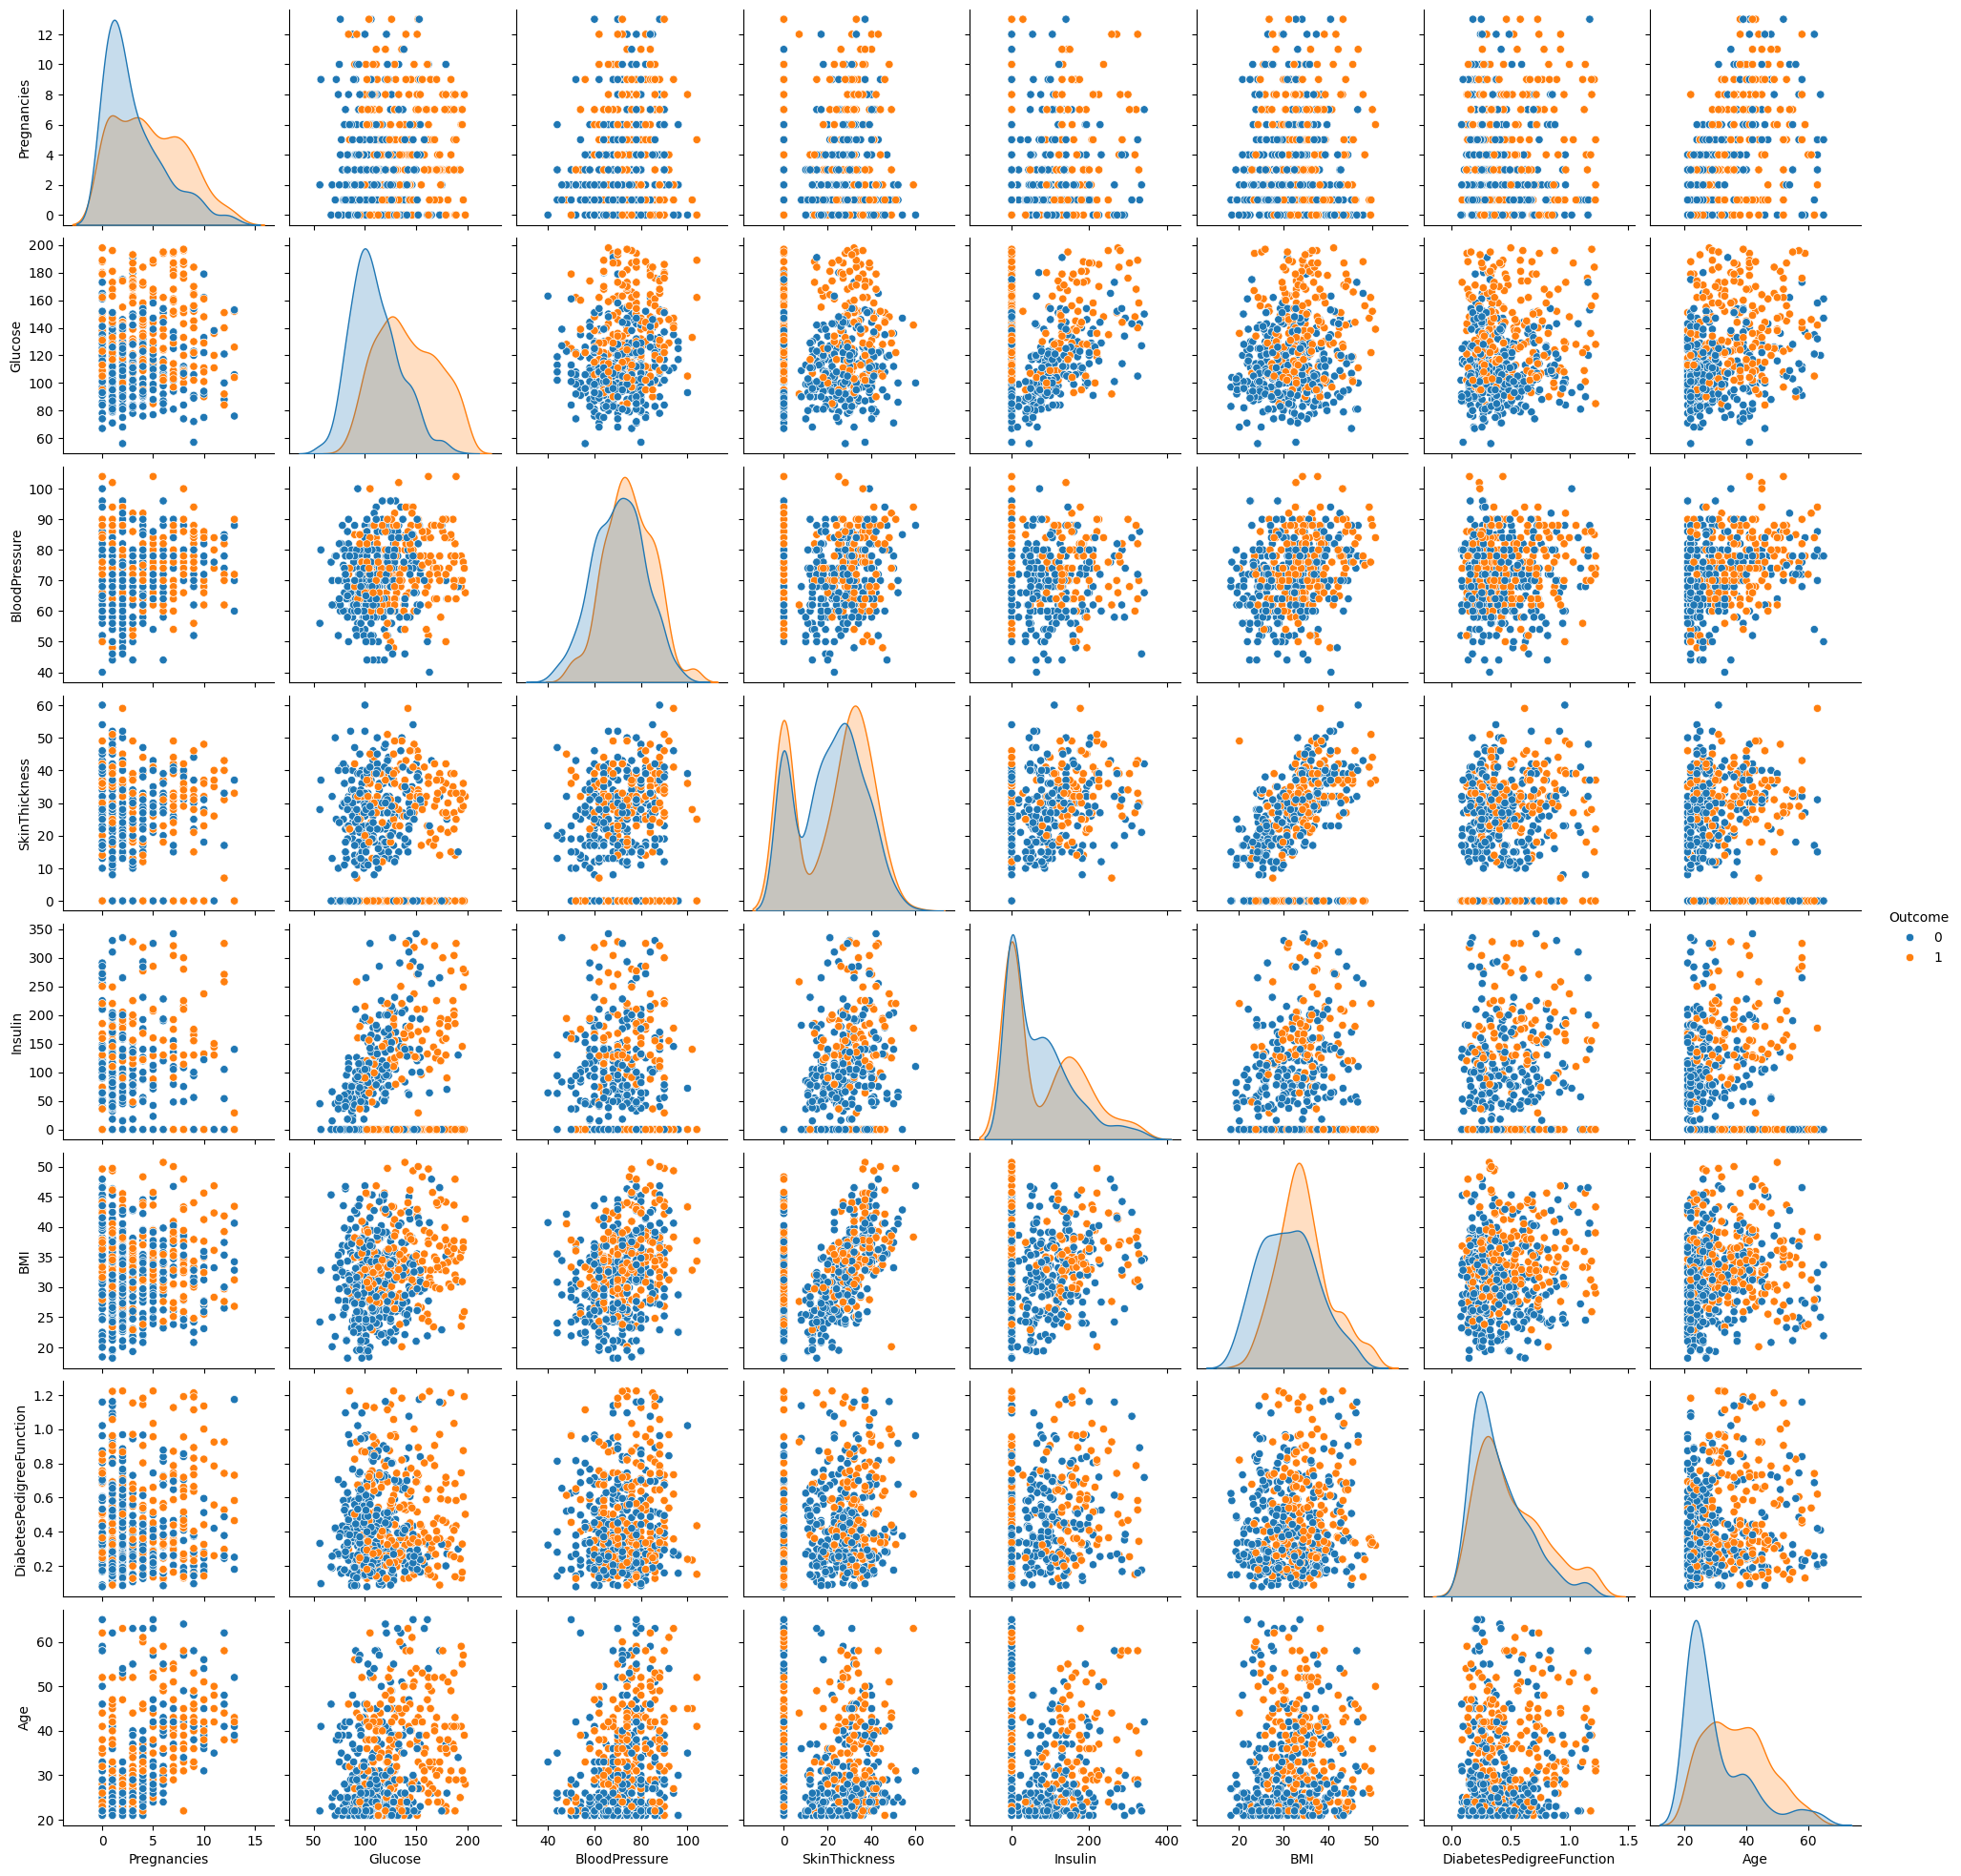

In [84]:
#Haciendo un pairplot para ver la correlacion entre las variables
sns.pairplot(df, hue='Outcome')

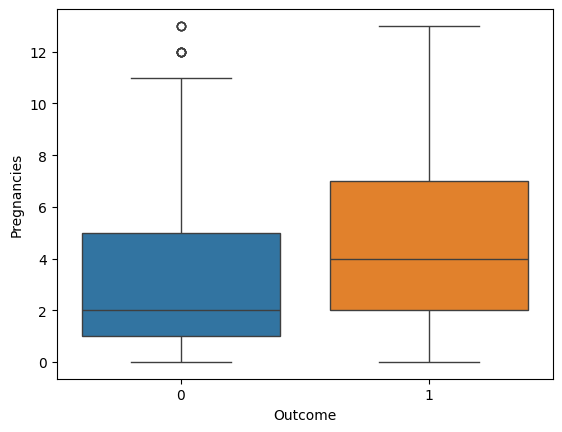

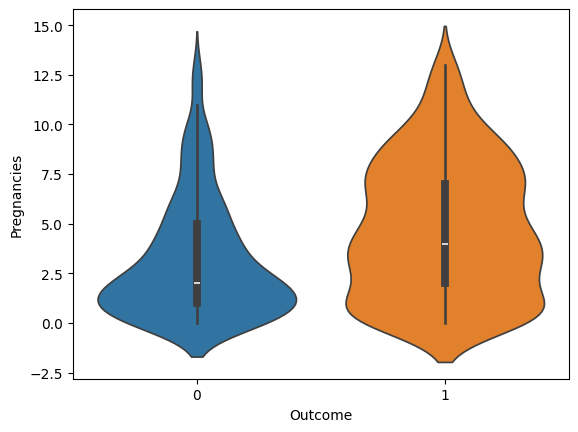

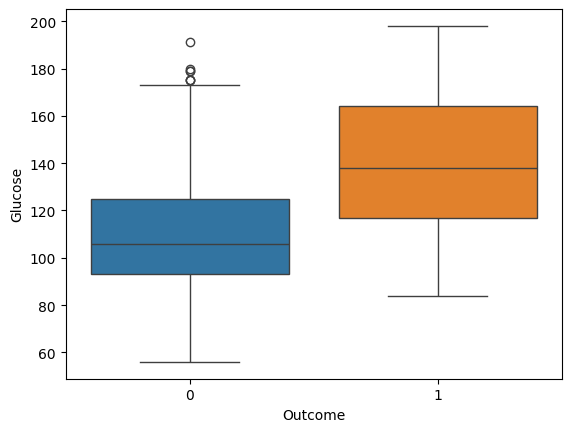

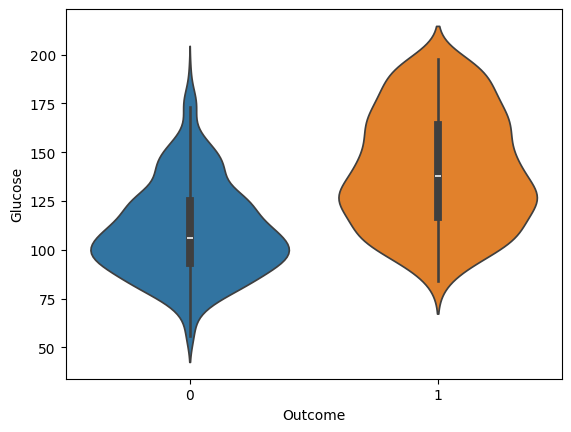

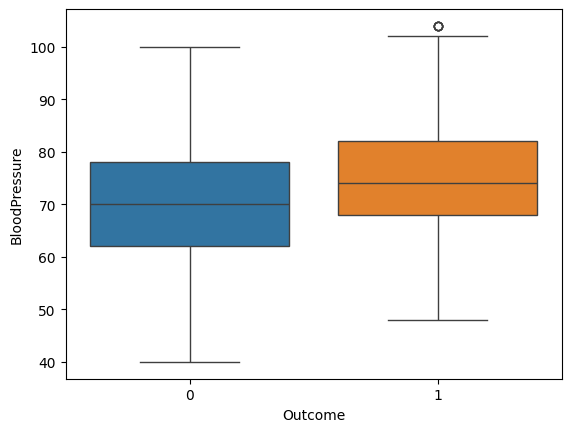

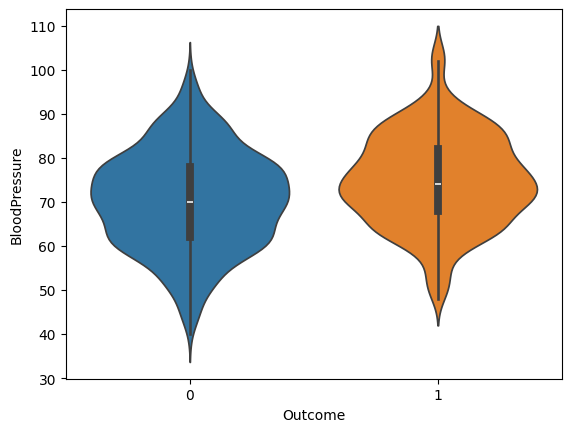

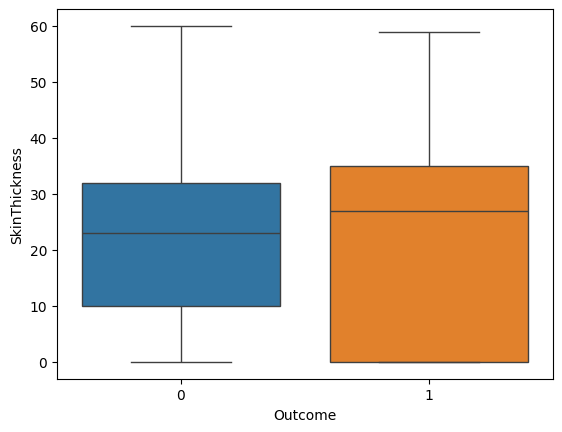

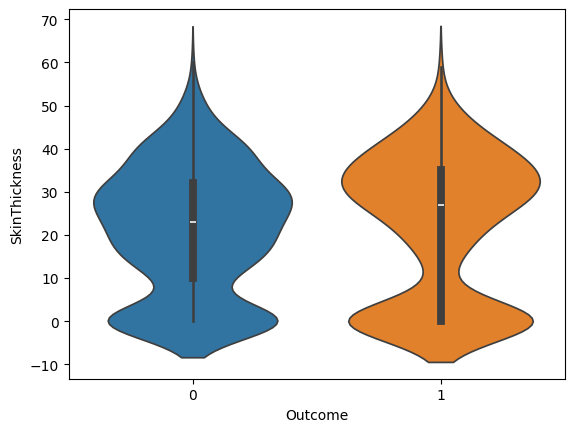

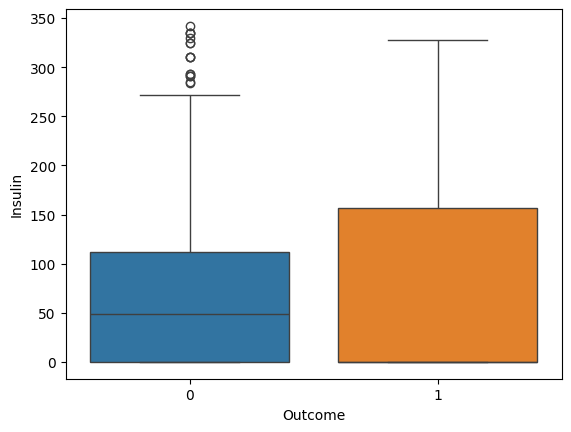

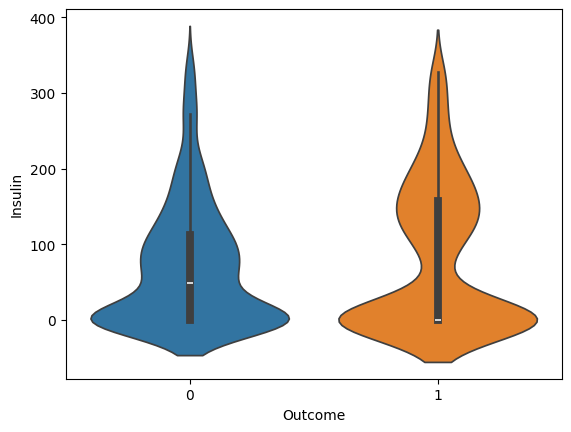

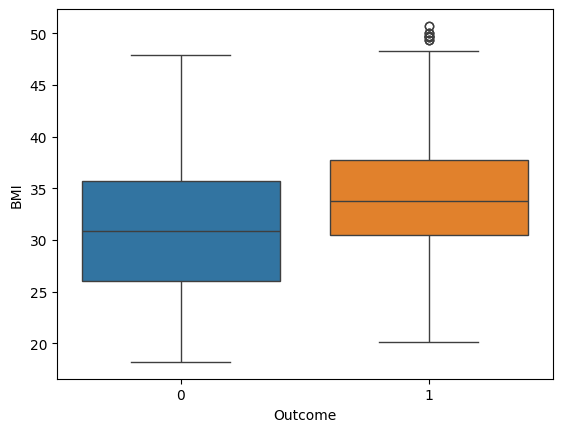

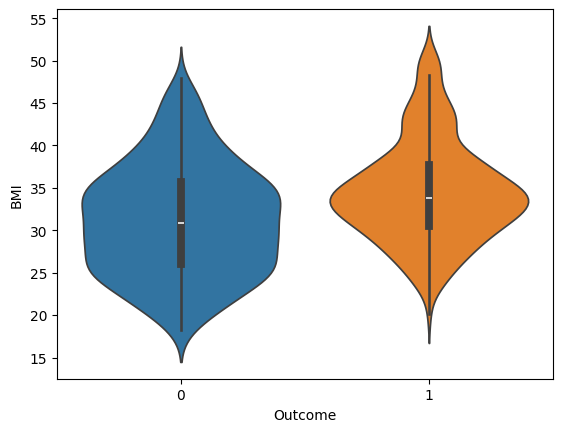

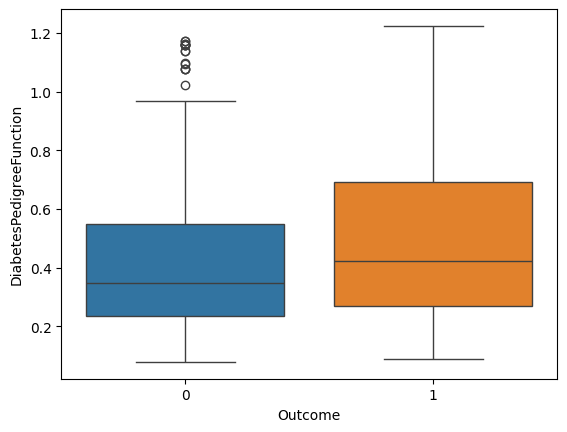

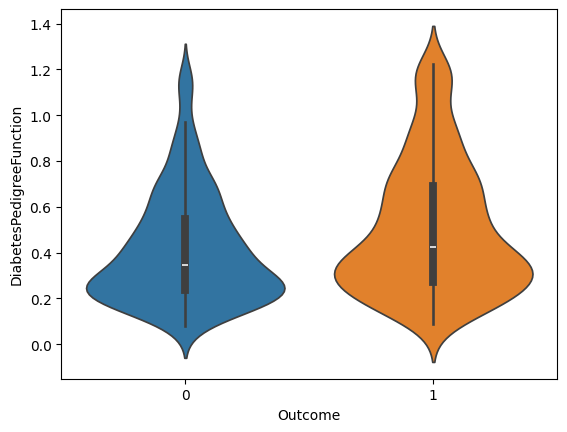

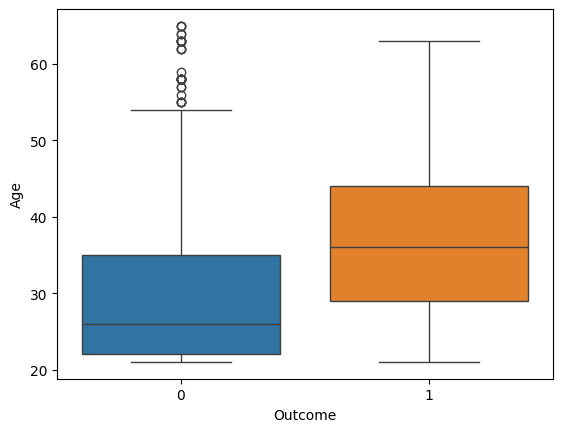

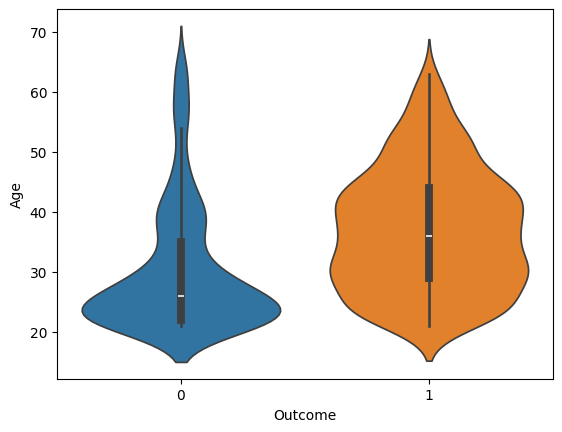

In [85]:
#Haciendo boxplots y violinplots para ver la distribucion de las variables  con una buena paleta de colores
for i in df.columns:
    if i != 'Outcome':
        sns.boxplot(hue='Outcome', x='Outcome', y=i, data=df, legend=False)
        plt.show()
        sns.violinplot(hue='Outcome', x='Outcome', y=i, data=df, legend=False)
        plt.show()

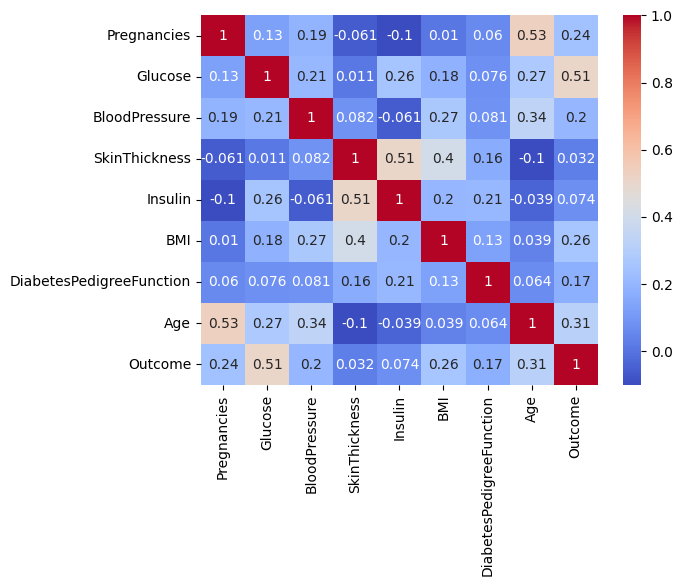

In [86]:
#Realizando matriz de correlación para ver qué variables utilizar.

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [87]:
#No utilizo la variables con menos de 0.17 de correlacion con la variable target
X = df.drop(["Outcome", "Age",  "Insulin"], axis=1)
y = df['Outcome']

#Dividiendo datos y entrenando el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Escalando datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.max_iter = 9999
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

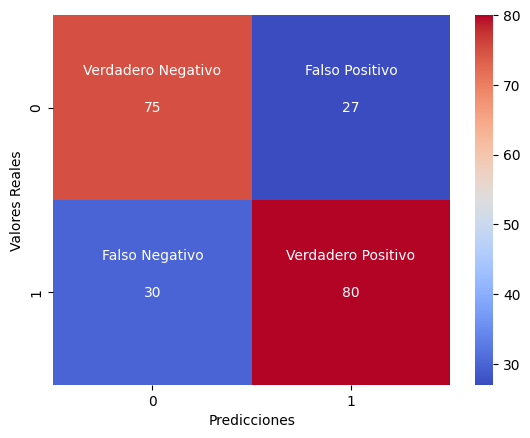

In [88]:
#Haciendo la matriz de confusión y graficandola con un heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Definir las etiquetas
etiquetas = ['Verdadero Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadero Positivo']

# Graficar el heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='coolwarm')


# Agregar las etiquetas dentro de cada cuadrado
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j + 0.5, i + 0.3, etiquetas[i * cm.shape[0] + j],
                       ha="center", va="center", color="white")

plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [89]:
#Calculando metricas de clasificacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7311320754716981
Precision: 0.7476635514018691
Recall: 0.7272727272727273
F1-score: 0.7373271889400922


In [90]:
#Calculando metricas de clasificacion con cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
print("Accuracy promedio:", scores.mean())
precision_scores = cross_val_score(model, X, y, cv=10, scoring='precision')
print("Precision promedio:", precision_scores.mean())
recall_scores = cross_val_score(model, X, y, cv=10, scoring='recall')
print("Recall promedio:", recall_scores.mean())
f1_scores = cross_val_score(model, X, y, cv=10, scoring='f1')
print("F1-score promedio:", f1_scores.mean())


Accuracy promedio: 0.7574932614555256
Precision promedio: 0.7734719851079975
Recall promedio: 0.7309869375907112
F1-score promedio: 0.7507624279588917


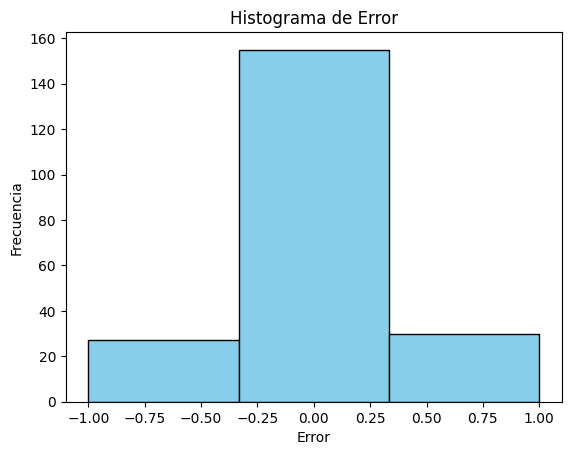

In [91]:
#Haciendo histograma de error
error = y_test - y_pred
plt.hist(error, color='skyblue', edgecolor='black', bins=3)
plt.title('Histograma de Error')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

#Utilizar más bins

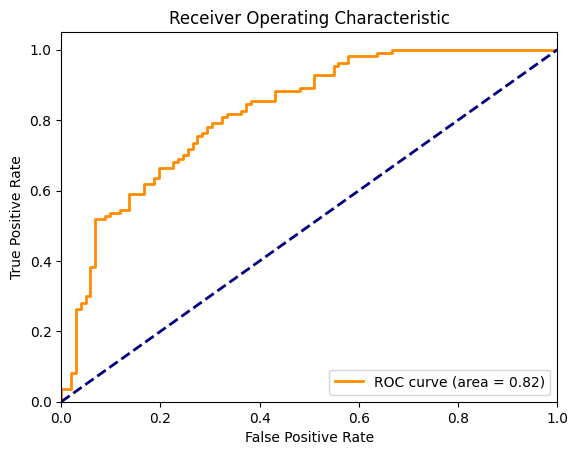

In [92]:
#Graficando area debajo de la curva (ROC)
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular probabilidades de predicción
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.7688679245283019
Precision: 0.7606837606837606
Recall: 0.8090909090909091
F1-score: 0.7841409691629956
************************************************************************************************************************
Accuracy promedio: 0.7196136567834681
Precision promedio: 0.7305304427028628
Recall promedio: 0.7009071117561684
F1-score promedio: 0.7136277984916835


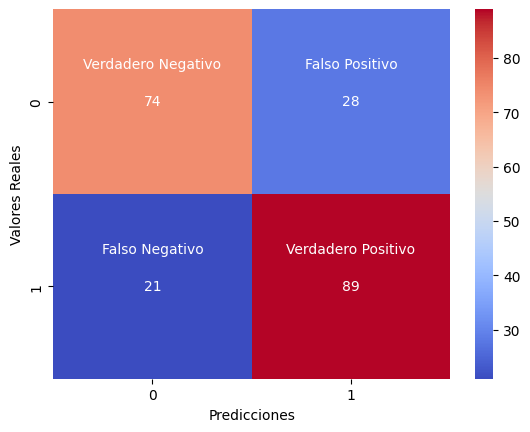

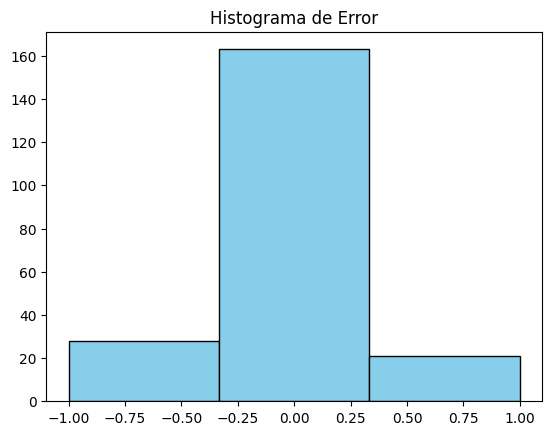

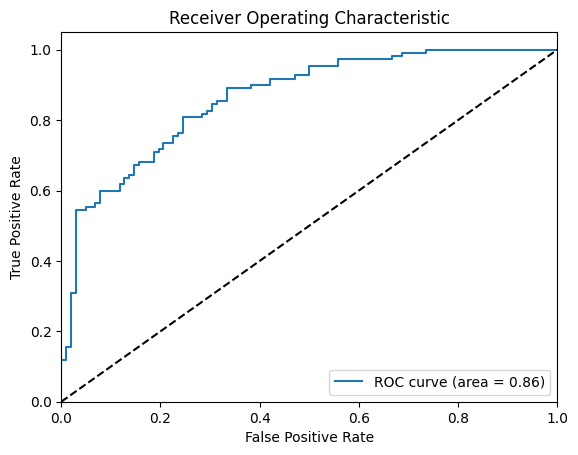

In [93]:
#Probando un modelo de SVM
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Calculando metricas de clasificacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("************"*10)

#Calculando metricas de clasificacion con cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
print("Accuracy promedio:", scores.mean())
precision_scores = cross_val_score(model, X, y, cv=10, scoring='precision')
print("Precision promedio:", precision_scores.mean())
recall_scores = cross_val_score(model, X, y, cv=10, scoring='recall')
print("Recall promedio:", recall_scores.mean())
f1_scores = cross_val_score(model, X, y, cv=10, scoring='f1')
print("F1-score promedio:", f1_scores.mean())



#Haciendo la matriz de confusión y graficandola con un heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Definir las etiquetas
etiquetas = ['Verdadero Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadero Positivo']

# Graficar el heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='coolwarm')


# Agregar las etiquetas dentro de cada cuadrado
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j + 0.5, i + 0.3, etiquetas[i * cm.shape[0] + j],
                       ha="center", va="center", color="white")

plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#Haciendo histograma de error
error = y_test - y_pred
plt.hist(error, color='skyblue', edgecolor='black', bins=3)
plt.title('Histograma de Error')
plt.show()

#Graficando curva ROC
y_pred_prob = model.decision_function(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.7830188679245284
Precision: 0.7622950819672131
Recall: 0.8454545454545455
F1-score: 0.8017241379310345
************************************************************************************************************************
Accuracy promedio: 0.7831087151841869
Precision promedio: 0.7684195742330513
Recall promedio: 0.814477503628447
F1-score promedio: 0.7897913268810253


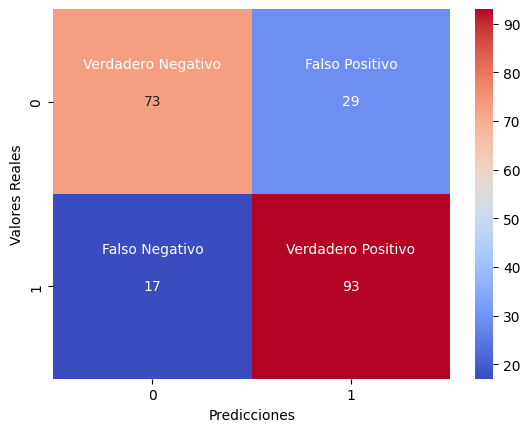

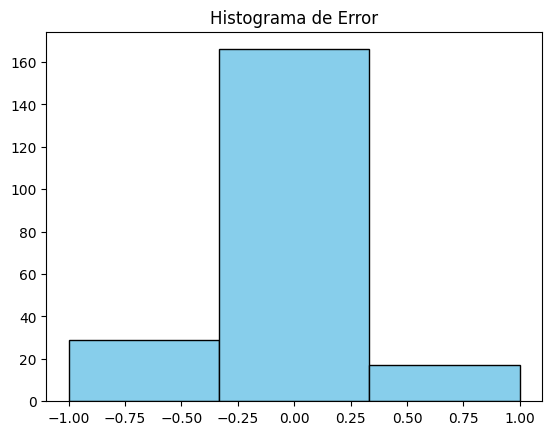

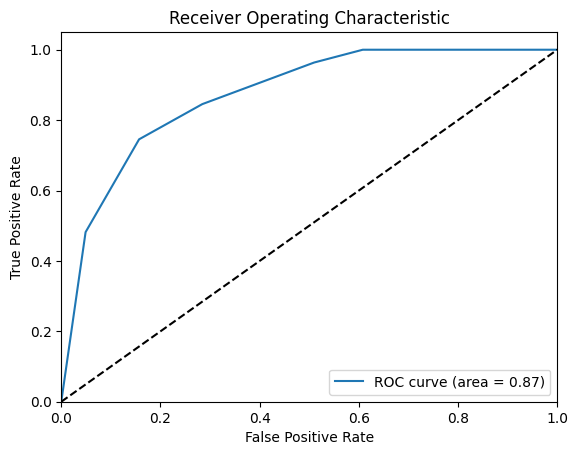

In [94]:
# Probando un modelo con KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Calculando metricas de clasificacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("************"*10)

#Calculando metricas de clasificacion con cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
print("Accuracy promedio:", scores.mean())
precision_scores = cross_val_score(model, X, y, cv=10, scoring='precision')
print("Precision promedio:", precision_scores.mean())
recall_scores = cross_val_score(model, X, y, cv=10, scoring='recall')
print("Recall promedio:", recall_scores.mean())
f1_scores = cross_val_score(model, X, y, cv=10, scoring='f1')
print("F1-score promedio:", f1_scores.mean())


#Haciendo la matriz de confusión y graficandola con un heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Definir las etiquetas
etiquetas = ['Verdadero Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadero Positivo']

# Graficar el heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='coolwarm')


# Agregar las etiquetas dentro de cada cuadrado
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j + 0.5, i + 0.3, etiquetas[i * cm.shape[0] + j],
                       ha="center", va="center", color="white")

plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#Haciendo histograma de error
error = y_test - y_pred
plt.hist(error, color='skyblue', edgecolor='black', bins=3)
plt.title('Histograma de Error')
plt.show()

#Graficando curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()